In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#SVM
from sklearn.svm import SVC

#RFE
from sklearn.feature_selection import RFE

#split into Train and Test set
from sklearn.model_selection import train_test_split

#Stats model Summary
import statsmodels.api as sm


## Data Reading and Preparation

In [3]:
telecom =pd.read_csv(r"telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# It is not possible to get details of the Dataset at a glance as it is a huge dataset, so will have it in chunks
telecom.iloc[:,0:20].describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000


In [7]:
telecom.iloc[:,20:41].describe()

,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,...,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9
count,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,...,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123
std,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,...,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.660000,...,1.600000,1.360000,9.880000,10.025000,9.810000,8.810000,0.000000,0.000000,0.000000,0.000000
50%,87.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.910000,...,11.730000,11.260000,41.030000,40.430000,40.360000,39.120000,0.000000,0.000000,0.000000,0.000000
75%,220.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.960000,...,40.110000,39.280000,110.390000,107.560000,109.090000,106.810000,2.080000,2.090000,2.040000,1.940000
max,10310.760000,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000,6431.330000,...,10752.560000,10389.240000,4729.740000,4557.140000,4961.330000,4429.880000,1466.030000,1196.430000,928.490000,927.410000


In [8]:
telecom.iloc[:,41:61].describe()

,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362
std,5.448946,7.533445,6.783335,5.619021,251.751489,248.731086,245.914311,245.934517,252.476533,263.631042,265.486090,267.184991,255.617850,269.347911,271.757783,261.407396,7.984970,8.599406,7.905971,8.261770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,17.110000,17.480000,17.110000,15.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,65.110000,63.685000,63.730000,61.840000,0.000000,0.000000,0.000000,0.000000,3.950000,3.635000,3.310000,2.500000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,168.270000,164.382500,166.110000,162.225000,30.807500,31.132500,30.580000,28.230000,53.290000,54.040000,52.490000,48.560000,0.000000,0.000000,0.000000,0.000000
max,342.860000,916.240000,502.090000,339.840000,10643.380000,7674.780000,11039.910000,11099.260000,7366.580000,8133.660000,8014.430000,9382.580000,8314.760000,9284.740000,13950.040000,10223.430000,628.560000,544.630000,516.910000,808.490000


In [9]:
telecom.iloc[:,61:82].describe()

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,...,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6
count,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000
mean,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,...,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,305.133424
std,0.0,0.0,0.0,0.0,389.948499,408.922934,411.633049,405.138658,25.765248,25.603052,...,21.310751,14.936449,20.661570,17.855111,16.328227,4.125911,2.161717,2.323464,3.635466,463.419481
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.740000
50%,0.0,0.0,0.0,0.0,11.640000,11.090000,10.410000,8.410000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.140000
75%,0.0,0.0,0.0,0.0,144.837500,150.615000,147.940000,142.105000,0.000000,0.000000,...,0.000000,2.430000,3.710000,3.990000,3.230000,0.000000,0.000000,0.000000,0.000000,372.860000
max,0.0,0.0,0.0,0.0,8432.990000,10936.730000,13980.060000,11495.310000,5900.660000,5490.280000,...,4244.530000,1023.210000,2372.510000,1390.880000,1635.710000,800.890000,370.130000,394.930000,787.790000,10674.030000


In [10]:
telecom.iloc[:,82:103].describe()

,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7
count,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000
mean,310.231175,304.119513,289.279198,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,...,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293,9.575993,10.011904
std,480.031178,478.150031,468.980002,140.258485,145.795055,137.239552,140.130610,171.713903,169.423620,169.723759,...,40.140895,42.977442,39.125379,43.840776,254.124029,256.242707,250.025523,249.845070,54.330607,57.411971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.010000,38.580000,25.510000,2.990000,3.230000,3.280000,3.290000,17.290000,18.590000,18.930000,...,0.000000,0.000000,0.000000,0.000000,30.390000,32.460000,32.740000,32.290000,0.000000,0.000000
50%,141.530000,138.610000,125.460000,15.690000,15.740000,16.030000,15.660000,56.490000,57.080000,58.240000,...,0.880000,0.930000,0.930000,0.960000,92.160000,92.550000,93.830000,91.640000,0.000000,0.000000
75%,378.570000,369.900000,353.480000,46.840000,45.810000,46.290000,45.180000,132.387500,130.960000,133.930000,...,8.140000,8.282500,8.110000,8.140000,208.075000,205.837500,207.280000,202.737500,4.060000,4.230000
max,11365.310000,14043.060000,11517.730000,6626.930000,9324.660000,10696.230000,10598.830000,4693.860000,4455.830000,6274.190000,...,1872.340000,1983.010000,2433.060000,4318.280000,7454.630000,9669.910000,10830.160000,10796.290000,5459.560000,5800.930000


In [11]:
telecom.iloc[:,103:124].describe()

,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,...,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000
mean,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,...,0.0,0.0,0.0,32.457179,33.887833,33.154735,31.229344,200.130037,202.853055,198.750783
std,55.073186,53.376273,80.793414,86.521393,83.683565,74.913050,16.495594,16.454061,15.812580,15.978601,...,0.0,0.0,0.0,106.283386,113.720168,110.127008,101.982303,291.651671,298.124954,289.321094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.010000,0.000000,38.530000,41.190000,38.290000
50%,0.000000,0.000000,2.030000,2.040000,2.030000,1.740000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,5.890000,5.960000,5.880000,5.380000,114.740000,116.340000,114.660000
75%,4.080000,3.510000,15.030000,15.740000,15.360000,14.260000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,26.930000,28.310000,27.710000,25.690000,251.670000,250.660000,248.990000
max,4309.290000,3819.830000,5647.160000,6141.880000,5645.860000,5689.760000,1351.110000,1136.080000,1394.890000,1431.960000,...,0.0,0.0,0.0,5712.110000,6745.760000,5957.140000,5956.660000,7716.140000,9699.010000,10830.380000


In [12]:
telecom.iloc[:,124:145].describe()

,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,...,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
count,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,189.214260,0.061557,0.033585,0.040361,0.163137,7.460608,8.334936,8.442001,8.063003,0.854656,...,0.970800,1.017162,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673
std,284.823024,0.160920,0.155725,0.146147,0.527860,59.722948,65.219829,63.813098,63.505379,11.955164,...,13.284348,12.381172,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000
50%,105.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000
75%,236.320000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000
max,10796.590000,19.760000,21.330000,16.860000,62.380000,6789.410000,5289.540000,4127.010000,5057.740000,1362.940000,...,2327.510000,1005.230000,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000


In [13]:
telecom.iloc[:,145:166].describe()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000
mean,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249,2.463802,2.666419,2.651999,2.441170,126.393392
std,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712,2.789128,3.031593,3.074987,2.516339,108.477235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,25.000000
50%,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000,1.000000,1.000000,1.000000,2.000000,145.000000
75%,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000,3.000000,3.000000,3.000000,3.000000,177.000000
max,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000


In [14]:
telecom.iloc[:,166:187].describe()

,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,...,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7
count,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,...,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,...,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847
std,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,...,192.646318,196.791224,191.301305,188.400286,213.356445,212.302217,212.347892,198.653570,544.247227,541.494013
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,154.000000,154.000000,154.000000,164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,252.000000,252.000000,252.000000,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,...,7546.000000,4365.000000,4076.000000,4061.000000,10285.900000,7873.550000,11117.610000,8993.950000,45735.400000,28144.120000


In [15]:
telecom.iloc[:,187:208].describe()

,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,...,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,...,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,...,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075
std,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,...,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263
min,0.000000,0.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30036.060000,39221.270000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,...,1.000000,1.000000,1.000000,4.000000,5.000000,5.000000,4.000000,42.000000,48.000000,44.000000


In [16]:
telecom.iloc[:,208:227].describe()

,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,40.000000,14.000000,16.000000,16.000000,11.000000,29.000000,35.000000,41.000000,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


-  The average revenue per user for 3g and 2g data is negative
-  Extremely few users have night packs. These migh be college students
-  Very few people opt monthly 2G. Most of them go for 2g sachets.
-  Usage of 3g is more than 2g
-  columns 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9' have one unique value and can be removed
-  Form above we can delete the columns 'loc_og_t2o_mou', 'std_og_t2o_mou' and 'loc_ic_t2o_mou' since it has only one value which is 0.
-  The minimum value of average revenue per user for the 6th, 7th, 8th and 9th month is negative.
-  Roaming calls are either very high or zero. So, it seems very few people travel outstation and most of them are local. 

In [17]:
# Features with Datatype as object
obj_dtype=[col for col in telecom.columns if telecom[col].dtype=='O']
print(len(obj_dtype))
print(obj_dtype)

12
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [18]:
#Checking last_date_of_month_X columns of Dataset
telecom['last_date_of_month_6'].head(10)

0    6/30/2014
1    6/30/2014
2    6/30/2014
3    6/30/2014
4    6/30/2014
5    6/30/2014
6    6/30/2014
7    6/30/2014
8    6/30/2014
9    6/30/2014
Name: last_date_of_month_6, dtype: object

In [19]:
telecom['last_date_of_month_9'].head(10)

0    9/30/2014
1    9/30/2014
2    9/30/2014
3    9/30/2014
4    9/30/2014
5    9/30/2014
6    9/30/2014
7    9/30/2014
8    9/30/2014
9    9/30/2014
Name: last_date_of_month_9, dtype: object

In [20]:
# Since last_date_of_month_X doesn't seem to have any valuable information, we can delete these  columns
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1, inplace=True)

In [21]:
#Checking the Shape again
telecom.shape

(99999, 222)

In [22]:
#Checking date_of_last_rech_X columns
telecom['date_of_last_rech_7'].head(10)

0    7/16/2014
1    7/31/2014
2    7/24/2014
3    7/31/2014
4    7/28/2014
5    7/17/2014
6    7/31/2014
7    7/25/2014
8    7/31/2014
9    7/23/2014
Name: date_of_last_rech_7, dtype: object

In [23]:
# Features with Datatype as object again
obj_dtype=[col for col in telecom.columns if telecom[col].dtype=='O']
print(len(obj_dtype))

8


In [24]:
#Converting the remaining Date columns from string to Datetime

telecom['date_of_last_rech_6']=pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7']=pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8']=pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_9']=pd.to_datetime(telecom['date_of_last_rech_9'])
telecom['date_of_last_rech_data_6']=pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7']=pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8']=pd.to_datetime(telecom['date_of_last_rech_data_8'])
telecom['date_of_last_rech_data_9']=pd.to_datetime(telecom['date_of_last_rech_data_9'])

In [25]:
# Now we will drop the columns which have only one unique value
for col in telecom.columns:
    if telecom[col].nunique() ==1:
        telecom.drop(col,axis=1, inplace=True)

In [26]:
telecom.shape

(99999, 210)

In [27]:
## Handling Missing values
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number        0.000000
arpu_6               0.000000
arpu_7               0.000000
arpu_8               0.000000
arpu_9               0.000000
onnet_mou_6          3.937039
onnet_mou_7          3.859039
onnet_mou_8          5.378054
onnet_mou_9          7.745077
offnet_mou_6         3.937039
offnet_mou_7         3.859039
offnet_mou_8         5.378054
offnet_mou_9         7.745077
roam_ic_mou_6        3.937039
roam_ic_mou_7        3.859039
roam_ic_mou_8        5.378054
roam_ic_mou_9        7.745077
roam_og_mou_6        3.937039
roam_og_mou_7        3.859039
roam_og_mou_8        5.378054
roam_og_mou_9        7.745077
loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6     3.937039
                      ...    
arpu_2g_9           74.077741
night_pck_user_6    74.846748
night_pck_

Since there are Large number of columns we can divide them into different Buckets for analysis of missing values.
-  0 < missing values <= 10%
-  10 < missing values < 50%
-  missing values >= 50%

In [28]:
def Set1(df):
    '''Prints the columns having missing values less than 10%'''
    for col in df.columns:
        if (df[col].isnull().sum()/len(df[col]) <= 0.10) & (df[col].isnull().sum()/len(df[col]) != 0.0):
            print(col+" -", round(100*df[col].isnull().sum()/len(df[col]),2),"(", df[col].dtype, ")")
def Set2(df):
    '''Prints the columns having missing values between 10% and 50%'''
    for col in df.columns:
        if (df[col].isnull().sum()/len(df[col]) > 0.10) & (df[col].isnull().sum()/len(df[col]) < 0.50):
            print(col+" -", round(100*df[col].isnull().sum()/len(df[col]),2),"(", df[col].dtype, ")")
def Set3(df):
    '''Prints the columns having missing values more than 50%'''
    for col in df.columns:
        if (df[col].isnull().sum()/len(df[col]) >=0.50):
            print(col+" -", round(100*df[col].isnull().sum()/len(df[col]),2),"(", df[col].dtype, ")")

In [29]:
Set1(telecom)

onnet_mou_6 - 3.94 ( float64 )
onnet_mou_7 - 3.86 ( float64 )
onnet_mou_8 - 5.38 ( float64 )
onnet_mou_9 - 7.75 ( float64 )
offnet_mou_6 - 3.94 ( float64 )
offnet_mou_7 - 3.86 ( float64 )
offnet_mou_8 - 5.38 ( float64 )
offnet_mou_9 - 7.75 ( float64 )
roam_ic_mou_6 - 3.94 ( float64 )
roam_ic_mou_7 - 3.86 ( float64 )
roam_ic_mou_8 - 5.38 ( float64 )
roam_ic_mou_9 - 7.75 ( float64 )
roam_og_mou_6 - 3.94 ( float64 )
roam_og_mou_7 - 3.86 ( float64 )
roam_og_mou_8 - 5.38 ( float64 )
roam_og_mou_9 - 7.75 ( float64 )
loc_og_t2t_mou_6 - 3.94 ( float64 )
loc_og_t2t_mou_7 - 3.86 ( float64 )
loc_og_t2t_mou_8 - 5.38 ( float64 )
loc_og_t2t_mou_9 - 7.75 ( float64 )
loc_og_t2m_mou_6 - 3.94 ( float64 )
loc_og_t2m_mou_7 - 3.86 ( float64 )
loc_og_t2m_mou_8 - 5.38 ( float64 )
loc_og_t2m_mou_9 - 7.75 ( float64 )
loc_og_t2f_mou_6 - 3.94 ( float64 )
loc_og_t2f_mou_7 - 3.86 ( float64 )
loc_og_t2f_mou_8 - 5.38 ( float64 )
loc_og_t2f_mou_9 - 7.75 ( float64 )
loc_og_t2c_mou_6 - 3.94 ( float64 )
loc_og_t2c_mou_7

In [30]:
Set2(telecom)
# Hence we don't have any Column between 10% and 50%

In [31]:
Set3(telecom)

date_of_last_rech_data_6 - 74.85 ( datetime64[ns] )
date_of_last_rech_data_7 - 74.43 ( datetime64[ns] )
date_of_last_rech_data_8 - 73.66 ( datetime64[ns] )
date_of_last_rech_data_9 - 74.08 ( datetime64[ns] )
total_rech_data_6 - 74.85 ( float64 )
total_rech_data_7 - 74.43 ( float64 )
total_rech_data_8 - 73.66 ( float64 )
total_rech_data_9 - 74.08 ( float64 )
max_rech_data_6 - 74.85 ( float64 )
max_rech_data_7 - 74.43 ( float64 )
max_rech_data_8 - 73.66 ( float64 )
max_rech_data_9 - 74.08 ( float64 )
count_rech_2g_6 - 74.85 ( float64 )
count_rech_2g_7 - 74.43 ( float64 )
count_rech_2g_8 - 73.66 ( float64 )
count_rech_2g_9 - 74.08 ( float64 )
count_rech_3g_6 - 74.85 ( float64 )
count_rech_3g_7 - 74.43 ( float64 )
count_rech_3g_8 - 73.66 ( float64 )
count_rech_3g_9 - 74.08 ( float64 )
av_rech_amt_data_6 - 74.85 ( float64 )
av_rech_amt_data_7 - 74.43 ( float64 )
av_rech_amt_data_8 - 73.66 ( float64 )
av_rech_amt_data_9 - 74.08 ( float64 )
arpu_3g_6 - 74.85 ( float64 )
arpu_3g_7 - 74.43 ( fl

So,we see from above that majority of the columns have missing values <10. As we have sufficient data, we can see how much data we are left with after we remove the rows for these columns with missing values. But before we do that we ensure that we make a copy of the current data set so that we can use it again in case the result is not as per our satisfaction.

In [32]:
#making a copy of Telecom Dataset
telecom_2=telecom.copy()

In [33]:
# Length of the current data set (no of rows)
original_len = telecom.shape[0]

## Using derived Variables


In [34]:
# filling the na's with 0 
telecom_2['total_rech_amt_6'] = telecom_2['total_rech_amt_6'].fillna(0)
telecom_2['total_rech_amt_7'] = telecom_2['total_rech_amt_7'].fillna(0)
telecom_2['total_rech_amt_8'] = telecom_2['total_rech_amt_8'].fillna(0)
telecom_2['total_rech_amt_9'] = telecom_2['total_rech_amt_9'].fillna(0)
telecom_2['av_rech_amt_data_6'] = telecom_2['av_rech_amt_data_6'].fillna(0)
telecom_2['av_rech_amt_data_7'] = telecom_2['av_rech_amt_data_7'].fillna(0)
telecom_2['av_rech_amt_data_8'] = telecom_2['av_rech_amt_data_8'].fillna(0)
telecom_2['av_rech_amt_data_9'] = telecom_2['av_rech_amt_data_9'].fillna(0)
telecom_2['total_rech_data_6'] = telecom_2['total_rech_data_6'].fillna(0)
telecom_2['total_rech_data_7'] = telecom_2['total_rech_data_7'].fillna(0)
telecom_2['total_rech_data_8'] = telecom_2['total_rech_data_8'].fillna(0)
telecom_2['total_rech_data_9'] = telecom_2['total_rech_data_9'].fillna(0)

In [35]:
# total recharge amount for data
telecom_2['total_recharge_amt_data_6'] = telecom_2['av_rech_amt_data_6'] * telecom_2['total_rech_data_6']
telecom_2['total_recharge_amt_data_7'] = telecom_2['av_rech_amt_data_7'] * telecom_2['total_rech_data_7']
telecom_2['total_recharge_amt_data_8'] = telecom_2['av_rech_amt_data_6'] * telecom_2['total_rech_data_8']
telecom_2['total_recharge_amt_data_9'] = telecom_2['av_rech_amt_data_6'] * telecom_2['total_rech_data_9']

In [36]:
# total recharge amount including data
telecom_2['total_recharge_6'] = telecom_2['total_rech_amt_6'] + telecom_2['total_recharge_amt_data_6']
telecom_2['total_recharge_7'] = telecom_2['total_rech_amt_7'] + telecom_2['total_recharge_amt_data_7']
telecom_2['total_recharge_8'] = telecom_2['total_rech_amt_8'] + telecom_2['total_recharge_amt_data_8']
telecom_2['total_recharge_9'] = telecom_2['total_rech_amt_9'] + telecom_2['total_recharge_amt_data_9']

In [37]:
# Average recharge amount
telecom_2['avg_rech'] = (telecom_2['total_recharge_6']+telecom_2['total_recharge_7'])/2

In [38]:
#Using functions to Drops the rows whose columns have missing values < n% and returns the updated data frame
def dropN(df, n):
    for col in df.columns:
        if df[col].isnull().sum()/len(df[col]) < (n/100):
            df.drop(df.loc[df[col].isnull()].index, axis = 0, inplace = True)

### Creating Dataframe for High Value Customers

In [39]:
# finding the 70th percentile value of the average recharge amount for two months
avg_rech_percentile_07 = telecom_2['avg_rech'].quantile(0.7)
avg_rech_percentile_07

478.0

In [40]:
telecom_2 = telecom_2[telecom_2['avg_rech'] >= avg_rech_percentile_07]
telecom_2.shape

(30001, 219)

In [41]:
## Tagging Churn Flags to Customers with 1 and 0

telecom_2['churn'] = 1
telecom_2.loc[(telecom_2['total_ic_mou_9'] == 0) & 
                 (telecom_2['total_og_mou_9'] == 0) & 
                 (telecom_2['vol_2g_mb_9'] == 0) & 
                 (telecom_2['vol_3g_mb_9'] == 0), 
                 'churn'] = 0

In [42]:
round(100*telecom_2['churn'].value_counts()/len(telecom_2['churn']),2)

1    91.86
0     8.14
Name: churn, dtype: float64

In [43]:
##Lets again check the missng value percentage after filtering the high value customers
# calling function for getting missing values <10%
Set1(telecom_2)

onnet_mou_6 - 1.82 ( float64 )
onnet_mou_7 - 1.79 ( float64 )
onnet_mou_8 - 3.91 ( float64 )
onnet_mou_9 - 6.34 ( float64 )
offnet_mou_6 - 1.82 ( float64 )
offnet_mou_7 - 1.79 ( float64 )
offnet_mou_8 - 3.91 ( float64 )
offnet_mou_9 - 6.34 ( float64 )
roam_ic_mou_6 - 1.82 ( float64 )
roam_ic_mou_7 - 1.79 ( float64 )
roam_ic_mou_8 - 3.91 ( float64 )
roam_ic_mou_9 - 6.34 ( float64 )
roam_og_mou_6 - 1.82 ( float64 )
roam_og_mou_7 - 1.79 ( float64 )
roam_og_mou_8 - 3.91 ( float64 )
roam_og_mou_9 - 6.34 ( float64 )
loc_og_t2t_mou_6 - 1.82 ( float64 )
loc_og_t2t_mou_7 - 1.79 ( float64 )
loc_og_t2t_mou_8 - 3.91 ( float64 )
loc_og_t2t_mou_9 - 6.34 ( float64 )
loc_og_t2m_mou_6 - 1.82 ( float64 )
loc_og_t2m_mou_7 - 1.79 ( float64 )
loc_og_t2m_mou_8 - 3.91 ( float64 )
loc_og_t2m_mou_9 - 6.34 ( float64 )
loc_og_t2f_mou_6 - 1.82 ( float64 )
loc_og_t2f_mou_7 - 1.79 ( float64 )
loc_og_t2f_mou_8 - 3.91 ( float64 )
loc_og_t2f_mou_9 - 6.34 ( float64 )
loc_og_t2c_mou_6 - 1.82 ( float64 )
loc_og_t2c_mou_7

In [44]:
Set2(telecom_2)

date_of_last_rech_data_6 - 44.15 ( datetime64[ns] )
date_of_last_rech_data_7 - 43.15 ( datetime64[ns] )
date_of_last_rech_data_8 - 46.83 ( datetime64[ns] )
date_of_last_rech_data_9 - 49.27 ( datetime64[ns] )
max_rech_data_6 - 44.15 ( float64 )
max_rech_data_7 - 43.15 ( float64 )
max_rech_data_8 - 46.83 ( float64 )
max_rech_data_9 - 49.27 ( float64 )
count_rech_2g_6 - 44.15 ( float64 )
count_rech_2g_7 - 43.15 ( float64 )
count_rech_2g_8 - 46.83 ( float64 )
count_rech_2g_9 - 49.27 ( float64 )
count_rech_3g_6 - 44.15 ( float64 )
count_rech_3g_7 - 43.15 ( float64 )
count_rech_3g_8 - 46.83 ( float64 )
count_rech_3g_9 - 49.27 ( float64 )
arpu_3g_6 - 44.15 ( float64 )
arpu_3g_7 - 43.15 ( float64 )
arpu_3g_8 - 46.83 ( float64 )
arpu_3g_9 - 49.27 ( float64 )
arpu_2g_6 - 44.15 ( float64 )
arpu_2g_7 - 43.15 ( float64 )
arpu_2g_8 - 46.83 ( float64 )
arpu_2g_9 - 49.27 ( float64 )
night_pck_user_6 - 44.15 ( float64 )
night_pck_user_7 - 43.15 ( float64 )
night_pck_user_8 - 46.83 ( float64 )
night_pck

In [45]:
Set3(telecom_2)

So, we can see that now after filtering out the high value customers there are no missing values in the > 50% set. Lets now proceed for missing value treatment.

### Imputing missing Values with 0

Majority of the value for the column date_of_last_rech_data is blank. Now this could either mean that the customer did not recharged the number for data packs or it might also mean that the value is missing at random. Lets validate if this is at random or in sync with other data related columns

In [46]:
#Validating for 6th Month
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'max_rech_data_6'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'count_rech_2g_6'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'count_rech_3g_6'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'arpu_3g_6'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'night_pck_user_6'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_6'].isnull(), 'fb_user_6'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [47]:
#Validating for 7th Month
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'max_rech_data_7'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'count_rech_2g_7'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'count_rech_3g_7'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'arpu_3g_7'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'night_pck_user_7'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_7'].isnull(), 'fb_user_7'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [48]:
#Validating for 8th Month
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'max_rech_data_8'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'count_rech_2g_8'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'count_rech_3g_8'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'arpu_3g_8'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'night_pck_user_8'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_8'].isnull(), 'fb_user_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [49]:
#Validating for 9th Month
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'max_rech_data_9'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'count_rech_2g_9'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'count_rech_3g_9'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'arpu_3g_9'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'night_pck_user_9'].sum())
print(telecom_2.loc[telecom_2['date_of_last_rech_data_9'].isnull(), 'fb_user_9'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


- So, we can see from above that the values in the columns date_of_last_rech_data, max_rech_data, count_rech_2g, count_rech_3g,arpu_3g, night_pck_user and fb_user are not missing at random.
- We can impute the missing values in the columns max_rech_data_X, count_rech_2g, count_rech_3g,arpu_3g, night_pck_user,arpu_2g_9 and fb_user with zero. 

In [50]:
# create a list of recharge columns where we will impute missing values with zeroes
impute_zero = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
               'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
               'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
               'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
               'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
               'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [51]:
# impute missing values with 0
telecom_2[impute_zero] = telecom_2[impute_zero].apply(lambda x: x.fillna(0))

In [52]:
# Let's check values are imputed correctly
print(telecom_2[impute_zero].isnull().sum()*100/telecom_2.shape[0])

count_rech_2g_6     0.0
count_rech_2g_7     0.0
count_rech_2g_8     0.0
count_rech_2g_9     0.0
max_rech_data_6     0.0
max_rech_data_7     0.0
max_rech_data_8     0.0
max_rech_data_9     0.0
count_rech_3g_6     0.0
count_rech_3g_7     0.0
count_rech_3g_8     0.0
count_rech_3g_9     0.0
arpu_3g_6           0.0
arpu_3g_7           0.0
arpu_3g_8           0.0
arpu_3g_9           0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
arpu_2g_6           0.0
arpu_2g_7           0.0
arpu_2g_8           0.0
arpu_2g_9           0.0
dtype: float64


In [53]:
# Creating new columns and imputing the values
import datetime as dt
now = dt.datetime(2014,9,30)
telecom_2['days_since_last_rech_data_6'] = (now - telecom_2['date_of_last_rech_data_6'])
telecom_2['days_since_last_rech_data_6'] = telecom_2['days_since_last_rech_data_6'].fillna(-1)
telecom_2['days_since_last_rech_data_7'] = (now - telecom_2['date_of_last_rech_data_7'])
telecom_2['days_since_last_rech_data_7'] = telecom_2['days_since_last_rech_data_7'].fillna(-1)
telecom_2['days_since_last_rech_data_8'] = (now - telecom_2['date_of_last_rech_data_8'])
telecom_2['days_since_last_rech_data_8'] = telecom_2['days_since_last_rech_data_8'].fillna(-1)
telecom_2['days_since_last_rech_data_9'] = (now - telecom_2['date_of_last_rech_data_9'])
telecom_2['days_since_last_rech_data_9'] = telecom_2['days_since_last_rech_data_9'].fillna(-1)

In [54]:
# Converting timedelta to float dtype
telecom_2['days_since_last_rech_data_6'] = telecom_2['days_since_last_rech_data_6']/dt.timedelta(days = 1)
telecom_2['days_since_last_rech_data_7'] = telecom_2['days_since_last_rech_data_7']/dt.timedelta(days = 1)
telecom_2['days_since_last_rech_data_8'] = telecom_2['days_since_last_rech_data_8']/dt.timedelta(days = 1)
telecom_2['days_since_last_rech_data_9'] = telecom_2['days_since_last_rech_data_9']/dt.timedelta(days = 1)

In [55]:
#Deleting the date columns as now it is redundant
telecom_2.drop(['date_of_last_rech_data_6', 
                   'date_of_last_rech_data_7', 
                   'date_of_last_rech_data_8', 
                   'date_of_last_rech_data_9'], axis = 1, inplace = True)

In [56]:
# Checking again misisng values between 10% and 50%
Set2(telecom_2)

Now we can find that there are no Columns in this 10% to 50% so, we are left with less than 10%.

In [57]:
Set1(telecom_2)

onnet_mou_6 - 1.82 ( float64 )
onnet_mou_7 - 1.79 ( float64 )
onnet_mou_8 - 3.91 ( float64 )
onnet_mou_9 - 6.34 ( float64 )
offnet_mou_6 - 1.82 ( float64 )
offnet_mou_7 - 1.79 ( float64 )
offnet_mou_8 - 3.91 ( float64 )
offnet_mou_9 - 6.34 ( float64 )
roam_ic_mou_6 - 1.82 ( float64 )
roam_ic_mou_7 - 1.79 ( float64 )
roam_ic_mou_8 - 3.91 ( float64 )
roam_ic_mou_9 - 6.34 ( float64 )
roam_og_mou_6 - 1.82 ( float64 )
roam_og_mou_7 - 1.79 ( float64 )
roam_og_mou_8 - 3.91 ( float64 )
roam_og_mou_9 - 6.34 ( float64 )
loc_og_t2t_mou_6 - 1.82 ( float64 )
loc_og_t2t_mou_7 - 1.79 ( float64 )
loc_og_t2t_mou_8 - 3.91 ( float64 )
loc_og_t2t_mou_9 - 6.34 ( float64 )
loc_og_t2m_mou_6 - 1.82 ( float64 )
loc_og_t2m_mou_7 - 1.79 ( float64 )
loc_og_t2m_mou_8 - 3.91 ( float64 )
loc_og_t2m_mou_9 - 6.34 ( float64 )
loc_og_t2f_mou_6 - 1.82 ( float64 )
loc_og_t2f_mou_7 - 1.79 ( float64 )
loc_og_t2f_mou_8 - 3.91 ( float64 )
loc_og_t2f_mou_9 - 6.34 ( float64 )
loc_og_t2c_mou_6 - 1.82 ( float64 )
loc_og_t2c_mou_7

Here we see that except for the columns date_of_last_rech the pattern of misisng values for the remaining columns is same i.e., 1.82%, 1.79%, 3.91% and 6.34%. So we can say that these values are not missing at random. To confirm this we can cross verify using some columns.

In [58]:
print(telecom_2.loc[telecom_2['offnet_mou_8'].isnull(), 'offnet_mou_8'].sum())
print(telecom_2.loc[telecom_2['loc_og_t2c_mou_8'].isnull(), 'std_og_t2f_mou_8'].sum())
print(telecom_2.loc[telecom_2['onnet_mou_7'].isnull(), 'std_og_t2t_mou_7'].sum())
print(telecom_2.loc[telecom_2['og_others_9'].isnull(), 'ic_others_9'].sum())

0.0
0.0
0.0
0.0


By randomly filtering out some columns we conclude that these are not missing at random.

In [59]:
cols = [col for col in telecom_2.columns 
                      if (telecom_2[col].isnull().sum()/len(telecom_2[col]) <= 0.10) & 
                      (telecom_2[col].isnull().sum()/len(telecom_2[col]) != 0.0)]

In [60]:
# deleting the last four values from list for date_of_last_rech
del cols[-4:-1]
del cols[-1]

In [61]:
telecom_2[cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,...,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,...,28827.000000,28100.000000,29456.000000,29464.00000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000
mean,265.618262,272.700470,243.646938,225.795019,380.608111,384.994337,348.723294,323.747627,16.408431,12.872921,...,0.027649,0.127875,10.984229,12.09224,11.446169,11.263121,1.174790,1.527682,1.274322,1.390774
std,462.493645,482.972367,465.200856,447.196962,484.257474,500.807874,486.918550,455.596969,76.973057,76.454034,...,0.112796,0.433114,77.421743,80.89052,71.988368,75.230117,14.113843,16.141140,13.038515,14.188757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.240000,18.155000,14.255000,11.430000,78.575000,76.040000,58.670000,49.537500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.060000,86.885000,72.930000,65.340000,229.635000,227.120000,197.590000,178.185000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,297.415000,298.087500,255.025000,229.852500,494.780000,500.365000,455.385000,419.865000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.060000,0.000000,0.060000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,2613.310000,3813.290000,...,6.230000,19.460000,6789.410000,4747.91000,3432.880000,3262.310000,1344.140000,1495.940000,1209.860000,919.630000


We could not see any standard pattern above. So we are going ahead with imputation of missing values with 0

In [62]:
# impute missing values with 0
telecom_2[cols] = telecom_2[cols].apply(lambda x: x.fillna(0))

In [63]:
Set1(telecom_2)

date_of_last_rech_6 - 0.24 ( datetime64[ns] )
date_of_last_rech_7 - 0.33 ( datetime64[ns] )
date_of_last_rech_8 - 1.94 ( datetime64[ns] )
date_of_last_rech_9 - 2.72 ( datetime64[ns] )


We can't find any valid reason to drop these columns, so we will proceed to remove the null rows.

In [64]:
# making a copy of the data set
telecom_3 = telecom_2.copy()

In [65]:
# length of the current data set
len2 = telecom_3.shape[0]

In [66]:
#dropping the remaining columns which have missing values  less than 10%
dropN(telecom_3,10)

In [67]:
# percentage of predictors
round(100*telecom_3['churn'].value_counts()/len(telecom_3['churn']),2)

1    93.99
0     6.01
Name: churn, dtype: float64

In [68]:
telecom_3.isnull().sum()*100/telecom_2.shape[0]

mobile_number                  0.0
arpu_6                         0.0
arpu_7                         0.0
arpu_8                         0.0
arpu_9                         0.0
onnet_mou_6                    0.0
onnet_mou_7                    0.0
onnet_mou_8                    0.0
onnet_mou_9                    0.0
offnet_mou_6                   0.0
offnet_mou_7                   0.0
offnet_mou_8                   0.0
offnet_mou_9                   0.0
roam_ic_mou_6                  0.0
roam_ic_mou_7                  0.0
roam_ic_mou_8                  0.0
roam_ic_mou_9                  0.0
roam_og_mou_6                  0.0
roam_og_mou_7                  0.0
roam_og_mou_8                  0.0
roam_og_mou_9                  0.0
loc_og_t2t_mou_6               0.0
loc_og_t2t_mou_7               0.0
loc_og_t2t_mou_8               0.0
loc_og_t2t_mou_9               0.0
loc_og_t2m_mou_6               0.0
loc_og_t2m_mou_7               0.0
loc_og_t2m_mou_8               0.0
loc_og_t2m_mou_9    

Hence, we can now go ahead with further analysis and we will be using telecom_3 dataframe for our analysis.

We can also create 4 new columns days_since_last_rech for the four months and drop those date columns.

In [69]:
# creating new columns
now = dt.datetime(2014,9,30)
telecom_3['days_since_last_rech_6'] = (now - telecom_3['date_of_last_rech_6'])
telecom_3['days_since_last_rech_7'] = (now - telecom_3['date_of_last_rech_7'])
telecom_3['days_since_last_rech_8'] = (now - telecom_3['date_of_last_rech_8'])
telecom_3['days_since_last_rech_9'] = (now - telecom_3['date_of_last_rech_9'])

In [70]:
# Converting timedelta to float dtype
telecom_3['days_since_last_rech_6'] = telecom_3['days_since_last_rech_6']/dt.timedelta(days = 1)
telecom_3['days_since_last_rech_7'] = telecom_3['days_since_last_rech_7']/dt.timedelta(days = 1)
telecom_3['days_since_last_rech_8'] = telecom_3['days_since_last_rech_8']/dt.timedelta(days = 1)
telecom_3['days_since_last_rech_9'] = telecom_3['days_since_last_rech_9']/dt.timedelta(days = 1)

In [71]:
#Deleting the date columns as now it is redundant
telecom_3.drop(['date_of_last_rech_6', 
                   'date_of_last_rech_7', 
                   'date_of_last_rech_8', 
                   'date_of_last_rech_9'], axis = 1, inplace = True)

In [72]:
telecom_3.shape

(28757, 220)

Now removing all the attributes corresponding to the churn phase and september month

In [73]:
def columnName(col):
    '''returns flag = 1 if the column is appended with _9'''
    for char in col:
        if char.isdigit():
            if char== '9':
                flag = 1
            else:
                flag = 0
        else:
            flag = 0
    return flag

list_of_col_9 = []

# creating a list of these columns
for col in telecom_3.columns:
    flag = columnName(col)
    if flag == 1:
        list_of_col_9.append(col)

In [74]:
len(list_of_col_9)

53

In [75]:
# dropping these columns
telecom_3.drop(list_of_col_9,axis = 1, inplace = True)
telecom_3.shape

(28757, 167)

In [76]:
# dropping sept column as well
telecom_3.drop('sep_vbc_3g',axis = 1, inplace = True)
telecom_3.shape

(28757, 166)

## Exploratory Data Analysis

In [77]:
# create plotting functions
def data_type(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'
    
def univariate(var, stats=True):
    
    if data_type(var) == 'numerical':
        sns.distplot(var)        
    elif data_type(var) == 'categorical':
        sns.countplot(var)   
 

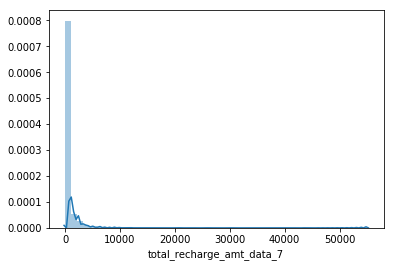

In [78]:
univariate(telecom_3.total_recharge_amt_data_7)

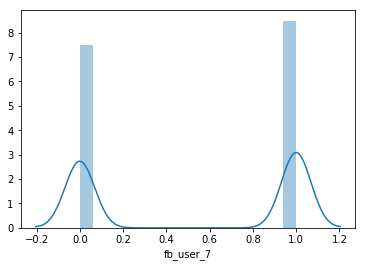

In [79]:
univariate(telecom_3.fb_user_7)

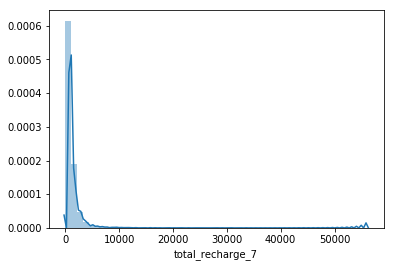

In [80]:
univariate(telecom_3.total_recharge_7)

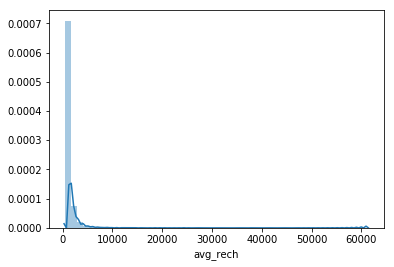

In [81]:
univariate(telecom_3.avg_rech)

#### Bivariate EDA

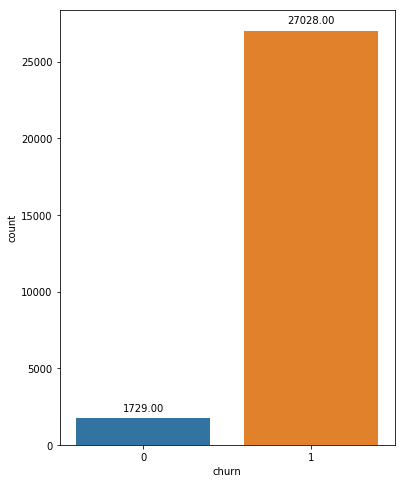

In [82]:
#visualizing churn-not churn customers
plt.figure(figsize=(6,8))
ax=sns.countplot(telecom_3.churn)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

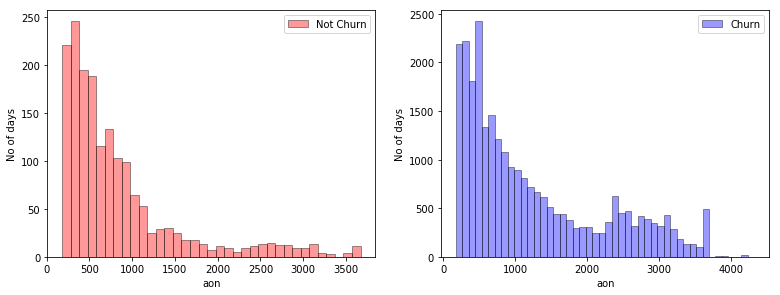

In [83]:
#visualizing the Age on network - number of days the customer is using the operator T network
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.distplot(telecom_3[telecom_3.churn==0].aon,color = 'red',label='Not Churn',kde=False,hist_kws={'edgecolor':'black'})
plt.gca().legend()
plt.ylabel('No of days')
plt.subplot(2,3,2)
sns.distplot(telecom_3[telecom_3.churn==1].aon,color = 'blue',label='Churn',kde=False,hist_kws={'edgecolor':'black'})
plt.gca().legend()
plt.ylabel('No of days')
plt.show()

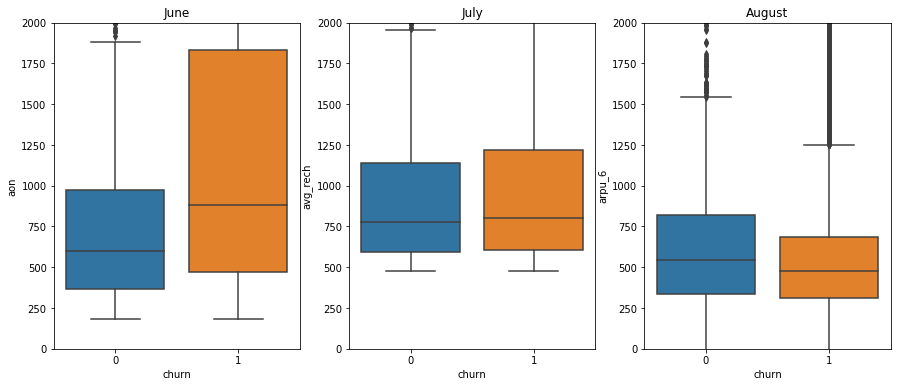

In [84]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.boxplot(y='aon',x='churn',data=telecom_3)
ax.set(ylim=(0, 2000))
plt.title("June")
plt.subplot(1,3,2)
ax = sns.boxplot(y='avg_rech',x='churn',data=telecom_3)
ax.set(ylim=(0, 2000))
plt.title("July")
plt.subplot(1,3,3)
ax = sns.boxplot(y='arpu_6',x='churn',data=telecom_3)
ax.set(ylim=(0, 2000))
plt.title("August")
plt.show()

## DATA Modelling

In [85]:
#Splitting dependant and independant variables
# putting predictors to X
X = telecom_3.drop(['churn','mobile_number'], axis = 1)
# putting response variable to y
y = telecom_3['churn']

In [86]:
#scaling variables with standard scaler
scaler = StandardScaler()
columns = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = columns
X.columns

C:\Users\NitishKumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NitishKumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_recharge_6', 'total_recharge_7', 'total_recharge_8', 'avg_rech',
       'days_since_last_rech_data_6', 'days_since_last_rech_data_7',
       'days_since_last_rech_data_8', 'days_since_last_rech_6',
       'days_since_last_rech_7', 'days_since_last_rech_8'],
      dtype='object', length=164)

In [87]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [88]:
#Applying PCA to train dataset
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

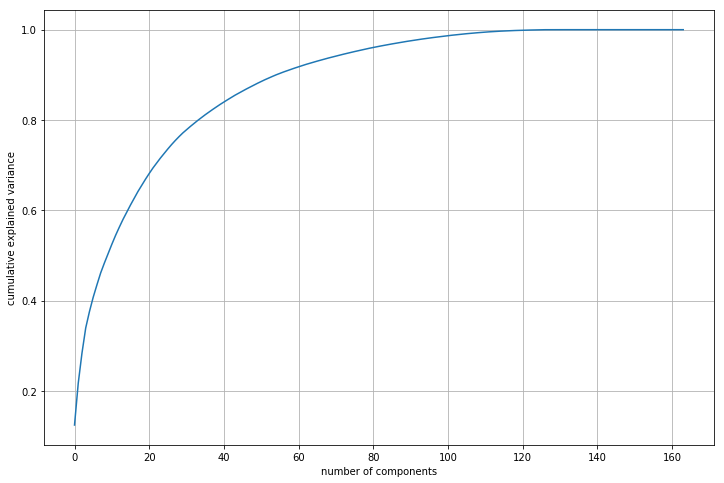

In [89]:
#Making the screeplot 
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [90]:
#Using PCA to find no of components to explain 95% variance atleast
pca_final = PCA(0.95)

In [91]:
#Again re-applying PCA to train data-set for independant variables
df_train_pca1 = pca_final.fit_transform(X_train)
df_train_pca1.shape
# we see that PCA selected 76 components

(20129, 76)

In [92]:
#Applyin PCA on test data-set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8628, 76)

In [93]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca1.transpose())

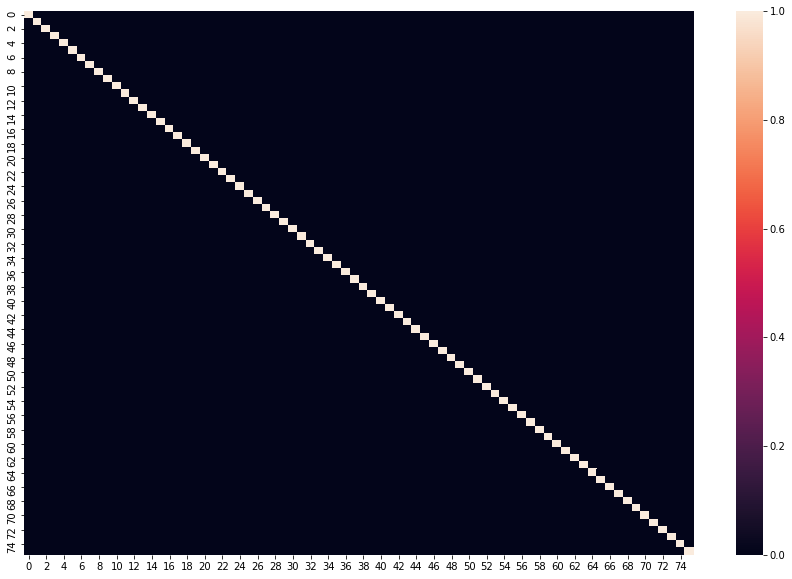

In [94]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat)

In [95]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.0901393537479706e-15 , min corr:  -1.1266961575993058e-15


Heatmap graph is very clean and clear, and we can see most of the components are pretty much independant of eachother

### Applyting Logistic Regression

As we have seen already, there is high class imbalance for the dependant variable 'CHURN', thus we are using `balanced` class_weight to overcome this issue

In [96]:
lr = LogisticRegression(class_weight='balanced')
lr_model_pca = lr.fit(df_train_pca1,y_train)

In [97]:
# predict
y_train_pred = lr_model_pca.predict(df_train_pca1)

#Making prediction on the train data
pred_probs_train = lr_model_pca.predict_proba(df_train_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.91'

In [98]:
# predict
y_pred = lr_model_pca.predict(df_test_pca)

#Making prediction on the test data
pred_probs_test = lr_model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.90'

### Evaluting Model Metrics

In [99]:
#Train data-set
# accuracy
print("accuracy", metrics.accuracy_score(y_train, y_train_pred))

# precision
print("precision", metrics.precision_score(y_train, y_train_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_train, y_train_pred))

# recall/sensitivity
print("F1-Score", metrics.f1_score(y_train, y_train_pred))

accuracy 0.8121118783844204
precision 0.9889075196698053
recall 0.8094383445945946
F1-Score 0.8902177068214804


In [100]:
#Test Dataset
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

# recall/sensitivity
print("F1-Score", metrics.f1_score(y_test, y_pred))

accuracy 0.8094575799721836
precision 0.9880266747499242
recall 0.8064077189510144
F1-Score 0.8880261544748672


Now that we have seen Logistics Regression metrics, let's apply SVM model as well and see how it works

### Applying SVM - rbf

In [101]:
# rbf SVM Model with default parameters
clf=SVC(kernel='rbf',class_weight='balanced',probability=True,gamma=0.01 , C=10)
clf.fit(df_train_pca1,y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
# predict on train dataset
y_train_pred3 = clf.predict(df_train_pca1)

#Making prediction on the train data
pred_probs_train3 = clf.predict_proba(df_train_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_train, pred_probs_train3))

'0.99'

In [103]:
# predict on test dataset
y_pred3 = clf.predict(df_test_pca)

#Making prediction on the test data
pred_probs_test3 = clf.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.88'

### Evaluating model metrics

In [104]:
#Train dataset
# accuracy
print("accuracy", metrics.accuracy_score(y_train, y_train_pred3))

# precision
print("precision", metrics.precision_score(y_train, y_train_pred3))

# recall/sensitivity
print("recall", metrics.recall_score(y_train, y_train_pred3))

# recall/sensitivity
print("F1-Score", metrics.f1_score(y_train, y_train_pred3))

accuracy 0.9556361468527994
precision 0.9993913572732805
recall 0.953441722972973
F1-Score 0.9758759488883485


In [105]:
#Test dataset
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred3))

# precision
print("precision", metrics.precision_score(y_test, y_pred3))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred3))

# recall/sensitivity
print("F1-Score", metrics.f1_score(y_test, y_pred3))

accuracy 0.9123783031988874
precision 0.9702258726899384
recall 0.9351806036615536
F1-Score 0.9523809523809523


## Modelling With RandomForest

In [106]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

In [107]:
# fit
rfc.fit(df_train_pca1,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [108]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [109]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [110]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.43      0.19      0.26       544
           1       0.95      0.98      0.96      8084

   micro avg       0.93      0.93      0.93      8628
   macro avg       0.69      0.59      0.61      8628
weighted avg       0.92      0.93      0.92      8628



In [111]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 104  440]
 [ 137 7947]]


In [112]:
print(accuracy_score(y_test,predictions))

0.9331247102457116


Grid Search to Find Optimal Hyperparameters

In [113]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [114]:
# Fit the grid search to the data
grid_search.fit(df_train_pca1,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [115]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9411297133488996 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


Fitting the final model with the best parameters obtained from grid search.

In [116]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [117]:
# fit
rfc.fit(df_train_pca1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
# predict
predictions = rfc.predict(df_test_pca)

In [119]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       544
           1       0.94      1.00      0.97      8084

   micro avg       0.94      0.94      0.94      8628
   macro avg       0.47      0.50      0.48      8628
weighted avg       0.88      0.94      0.91      8628



C:\Users\NitishKumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\NitishKumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\NitishKumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Feature Evaulations using RFE

In [121]:
# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [122]:
#Evaluating stats model 
col = X_train.columns[rfe.support_] # features selected

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train.tolist(),X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20129
Model:                            GLM   Df Residuals:                    20113
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Nov 2019   Deviance:                          nan
Time:                        23:20:14   Pearson chi2:                 5.93e+05
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3299      0.117     45.366      0.000       5.100       5.560
onnet_mou_7           -0.6573      0.081     -8.144      0.000      -0.816      -0.499
offnet_mou_7          -0.7360      0.079     -9.362      0.000      -0.890      -0.582
loc_og_t2t_mou_8       0.6228      0.154      4.050      0.000       0.321       0.924
loc_og_t2m_mou_6       0.3746      0.067      5.590      0.000       0.243       0.506
loc_og_t2f_mou_8       0.6356      0.170      3.734      0.000       0.302       0.969
std_og_mou_7           0.7819      0.103      7.607      0.000       0.580       0.983
loc_ic_t2m_mou_8       0.9431      0.447      2.110      0.035       0.067       1.819
loc_ic_mou_8           1.7367      0.521      3.331      0.001       0.715       2.759
total_ic_mou_6        -0.5210      0.055     -9.493      0.000      -0.629      -0.413
total_ic_mou_8         1.4994      0.255      5.879      0.000       1.000       1.999
spl_ic_mou_8           0.7107      0.117      6.089      0.000       0.482       0.939
total_rech_num_8       0.6703      0.061     10.934      0.000       0.550       0.790
av_rech_amt_data_8     1.1866      0.103     11.506      0.000       0.984       1.389
arpu_2g_8             -0.5255      0.086     -6.112      0.000      -0.694      -0.357
aug_vbc_3g             0.6414      0.112      5.720      0.000       0.422       0.861
======================================================================================
"""

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_7,9.27
7,loc_ic_mou_8,8.12
9,total_ic_mou_8,6.47
1,offnet_mou_7,5.31
0,onnet_mou_7,5.28
6,loc_ic_t2m_mou_8,3.88
12,av_rech_amt_data_8,3.73
13,arpu_2g_8,3.31
8,total_ic_mou_6,2.28
3,loc_og_t2m_mou_6,2.06


Among p-values and high vif, we would choose `std_og_mou_7`  to drop because p-value is under threshold but high vif means high correlation so will go ahead and drop this variable and the re-check stats summary

In [125]:
col = col.drop('std_og_mou_7', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train.tolist(),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20129
Model:                            GLM   Df Residuals:                    20114
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Nov 2019   Deviance:                          nan
Time:                        23:20:16   Pearson chi2:                 5.58e+05
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3201      0.118     45.023      0.000       5.088       5.552
onnet_mou_7           -0.0973      0.031     -3.153      0.002      -0.158      -0.037
offnet_mou_7          -0.1765      0.029     -6.152      0.000      -0.233      -0.120
loc_og_t2t_mou_8       0.2612      0.133      1.958      0.050      -0.000       0.523
loc_og_t2m_mou_6       0.1575      0.057      2.756      0.006       0.045       0.269
loc_og_t2f_mou_8       0.5874      0.168      3.488      0.000       0.257       0.918
loc_ic_t2m_mou_8       0.8773      0.450      1.951      0.051      -0.004       1.759
loc_ic_mou_8           1.8667      0.520      3.589      0.000       0.847       2.886
total_ic_mou_6        -0.5192      0.056     -9.342      0.000      -0.628      -0.410
total_ic_mou_8         1.4466      0.250      5.783      0.000       0.956       1.937
spl_ic_mou_8           0.7236      0.117      6.162      0.000       0.493       0.954
total_rech_num_8       0.6769      0.061     11.118      0.000       0.558       0.796
av_rech_amt_data_8     1.2050      0.103     11.688      0.000       1.003       1.407
arpu_2g_8             -0.5358      0.086     -6.257      0.000      -0.704      -0.368
aug_vbc_3g             0.6309      0.112      5.646      0.000       0.412       0.850
======================================================================================
"""

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_8,8.10
8,total_ic_mou_8,6.47
5,loc_ic_t2m_mou_8,3.87
11,av_rech_amt_data_8,3.73
12,arpu_2g_8,3.31
7,total_ic_mou_6,2.28
3,loc_og_t2m_mou_6,1.49
13,aug_vbc_3g,1.39
2,loc_og_t2t_mou_8,1.29
0,onnet_mou_7,1.26


Now we see onnet_mou_7 has high p-value leading to loss in predictive power. So will choose onnet_mou_7
drop next now.

In [127]:
col = col.drop('loc_ic_mou_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train.tolist(),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20129
Model:                            GLM   Df Residuals:                    20115
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Nov 2019   Deviance:                          nan
Time:                        23:20:17   Pearson chi2:                 1.66e+06
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2620      0.115     45.640      0.000       5.036       5.488
onnet_mou_7           -0.0970      0.031     -3.140      0.002      -0.158      -0.036
offnet_mou_7          -0.1820      0.029     -6.353      0.000      -0.238      -0.126
loc_og_t2t_mou_8       0.4217      0.159      2.659      0.008       0.111       0.733
loc_og_t2m_mou_6       0.1586      0.057      2.766      0.006       0.046       0.271
loc_og_t2f_mou_8       0.6065      0.168      3.601      0.000       0.276       0.937
loc_ic_t2m_mou_8       2.0814      0.282      7.374      0.000       1.528       2.635
total_ic_mou_6        -0.5124      0.056     -9.154      0.000      -0.622      -0.403
total_ic_mou_8         1.9718      0.244      8.092      0.000       1.494       2.449
spl_ic_mou_8           0.7208      0.117      6.146      0.000       0.491       0.951
total_rech_num_8       0.6709      0.061     11.024      0.000       0.552       0.790
av_rech_amt_data_8     1.2133      0.102     11.860      0.000       1.013       1.414
arpu_2g_8             -0.5379      0.084     -6.424      0.000      -0.702      -0.374
aug_vbc_3g             0.6384      0.112      5.701      0.000       0.419       0.858
======================================================================================
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_ic_mou_8,3.76
10,av_rech_amt_data_8,3.73
11,arpu_2g_8,3.31
5,loc_ic_t2m_mou_8,2.74
6,total_ic_mou_6,2.28
3,loc_og_t2m_mou_6,1.49
12,aug_vbc_3g,1.39
0,onnet_mou_7,1.26
2,loc_og_t2t_mou_8,1.25
1,offnet_mou_7,1.23


So now, all the variables look pretty much under threshold and with good p-values, let check the co-efficients

In [129]:
res.params.sort_values(ascending=False)

const                 5.262002
loc_ic_t2m_mou_8      2.081374
total_ic_mou_8        1.971829
av_rech_amt_data_8    1.213330
spl_ic_mou_8          0.720821
total_rech_num_8      0.670907
aug_vbc_3g            0.638443
loc_og_t2f_mou_8      0.606540
loc_og_t2t_mou_8      0.421711
loc_og_t2m_mou_6      0.158640
onnet_mou_7          -0.097037
offnet_mou_7         -0.181967
total_ic_mou_6       -0.512361
arpu_2g_8            -0.537934
dtype: float64

Important variables for churn indicators:
- `loc_ic_t2m_mou_8`
- `total_ic_mou_8`
- `av_rech_amt_data_8`

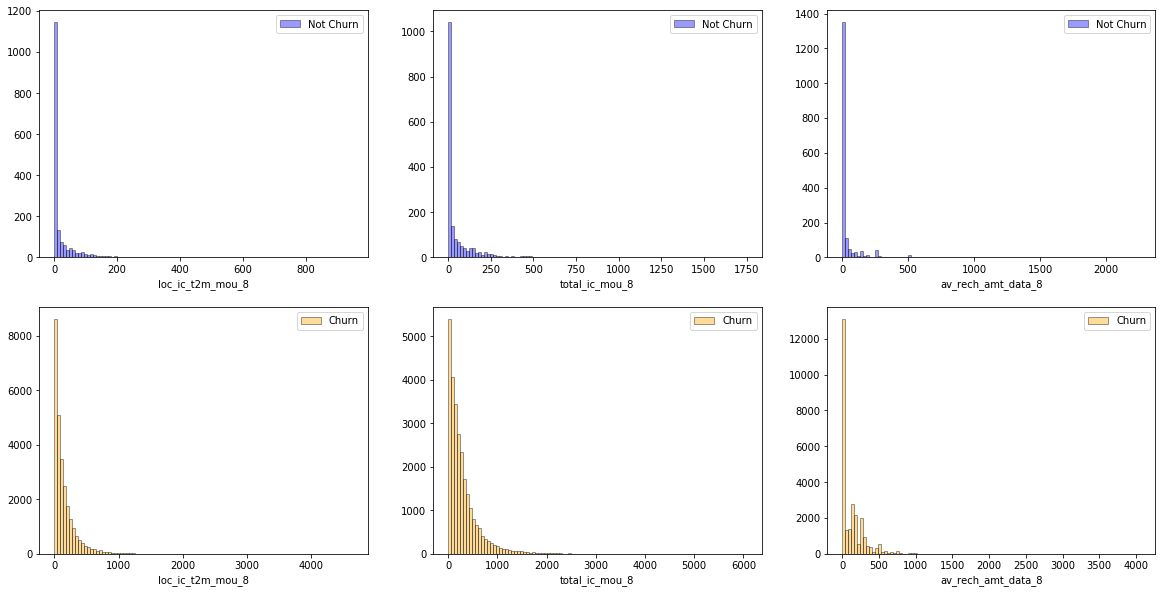

In [130]:
#visualizing the distribution for the top most features

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.distplot(telecom_3[telecom_3.churn==0]['loc_ic_t2m_mou_8'],hist=True, kde=False, bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'},label='Not Churn')
plt.gca().legend()
plt.subplot(2,3,2)
sns.distplot(telecom_3[telecom_3.churn==0]['total_ic_mou_8'],hist=True, kde=False, bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'},label='Not Churn')
plt.gca().legend()
plt.subplot(2,3,3)
sns.distplot(telecom_3[telecom_3.churn==0]['av_rech_amt_data_8'],hist=True, kde=False, bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'},label='Not Churn')
plt.gca().legend()
plt.subplot(2,3,4)
sns.distplot(telecom_3[telecom_3.churn==1]['loc_ic_t2m_mou_8'],hist=True, kde=False, bins=100, color = 'orange',
             hist_kws={'edgecolor':'black'},label='Churn')
plt.gca().legend()
plt.subplot(2,3,5)
sns.distplot(telecom_3[telecom_3.churn==1]['total_ic_mou_8'],hist=True, kde=False, bins=100, color = 'orange',
             hist_kws={'edgecolor':'black'},label='Churn')
plt.gca().legend()
plt.subplot(2,3,6)
sns.distplot(telecom_3[telecom_3.churn==1]['av_rech_amt_data_8'],hist=True, kde=False, bins=100, color = 'orange',
             hist_kws={'edgecolor':'black'},label='Churn')
plt.gca().legend()
plt.show()

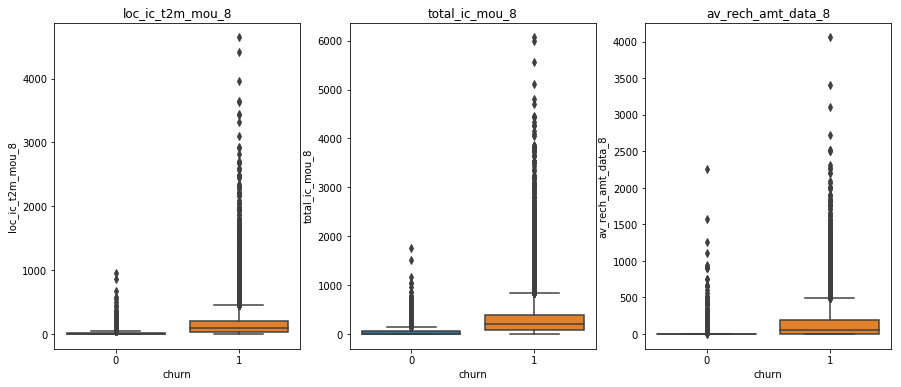

In [131]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
ax = sns.boxplot(y='loc_ic_t2m_mou_8',x='churn',data=telecom_3)
plt.title("loc_ic_t2m_mou_8")
plt.subplot(1,3,2)
ax = sns.boxplot(y='total_ic_mou_8',x='churn',data=telecom_3)
plt.title("total_ic_mou_8")
plt.subplot(1,3,3)
ax = sns.boxplot(y='av_rech_amt_data_8',x='churn',data=telecom_3)
plt.title("av_rech_amt_data_8")
plt.show()

# Recommendation

**customers with high monthly bill are churning , `av_rech_amt_data_8` . This might be due to the fact that these customers are on the wrong subscription package and thus they should be suggested to move to newer package that does not cost them as much. An example of this can be a user using internet from balance without data pack.

**We suggest that this customers should be given some offer package so as to retain them and reduce the fianancial impact on them.

total_ic_mou_8 and loc_ic_t2m_mou_8 indicate that the customers is making calls to a fixed line and receiving a lot of incoming call from same network provider. Thus primary contact of the customer is on another netwrok, this customer must be provided with a pack to bring the primary contact to same network..like a couple pack or a family usage pack.
